In [1]:
import pandas as pd
import numpy as np

sales = pd.read_csv(
    "/Users/linaabdulsamad/Desktop/Bootcamp/Chocolate/datasets/jl_sales.csv"
)

sales.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [2]:
sales["Date"] = pd.to_datetime(sales["Date"], dayfirst=True)


In [ ]:
# Clean the Amount column (remove $ and commas)
sales["Amount"] = (
    sales["Amount"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)


In [ ]:
# Ensure numeric columns
sales["Boxes Shipped"] = sales["Boxes Shipped"].astype(int)


In [ ]:
# Add time features
sales["Year"] = sales["Date"].dt.year
sales["Month"] = sales["Date"].dt.month


In [6]:
sales[["Amount", "Boxes Shipped"]].describe()



,Amount,Boxes Shipped
count,3282.000000,3282.000000
mean,6030.338775,164.666971
std,4393.980200,124.024736
min,7.000000,1.000000
25%,2521.495000,71.000000
50%,5225.500000,137.000000
75%,8556.842500,232.000000
max,26170.950000,778.000000


In [7]:
variation_sales = {
    "mean_sale_amount": sales["Amount"].mean(),
    "std_sale_amount": sales["Amount"].std(),
    "mean_boxes": sales["Boxes Shipped"].mean(),
    "std_boxes": sales["Boxes Shipped"].std(),
}

variation_sales


{'mean_sale_amount': np.float64(6030.338775137113),
 'std_sale_amount': np.float64(4393.980199908473),
 'mean_boxes': np.float64(164.66697135892747),
 'std_boxes': np.float64(124.02473551561465)}

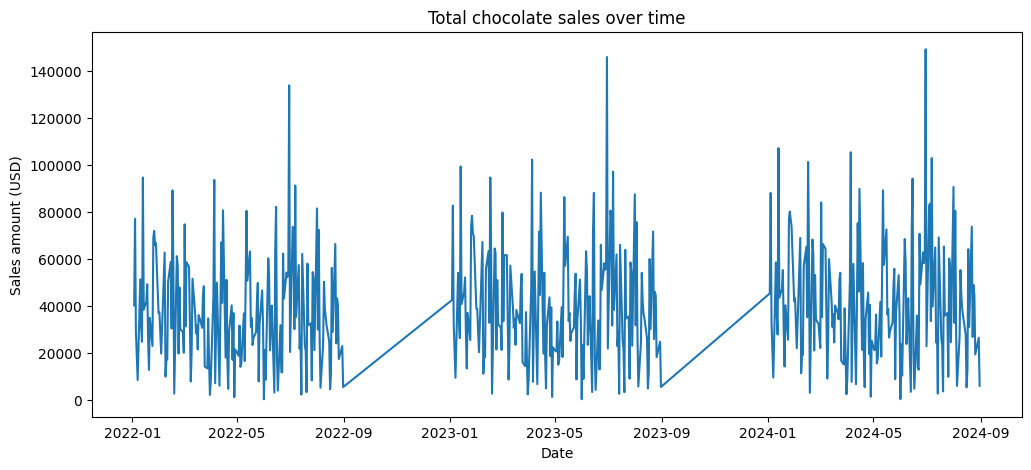

In [8]:
daily_sales = sales.groupby("Date")["Amount"].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Total chocolate sales over time")
plt.xlabel("Date")
plt.ylabel("Sales amount (USD)")
plt.show()


/var/folders/2x/d230_27s5m77vy1w0186q7n00000gn/T/ipykernel_82124/3075748310.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="Date", freq="M"))["Amount"]


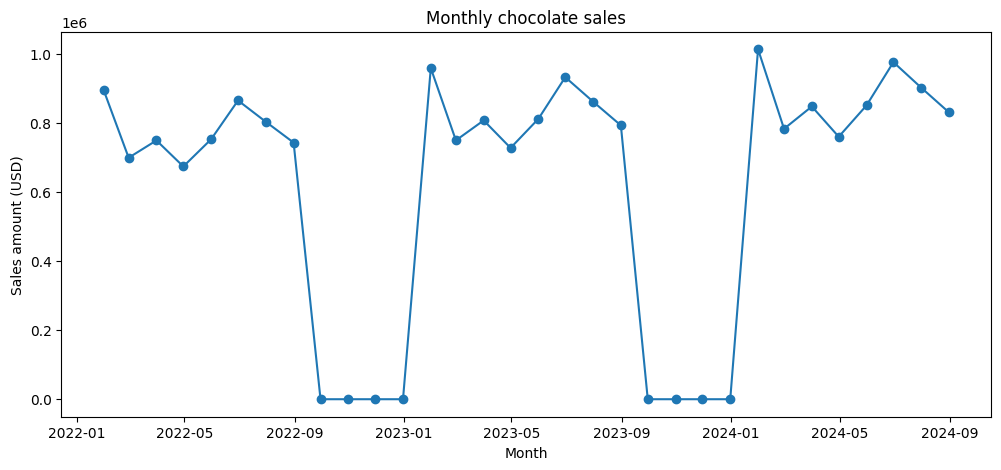

In [15]:
monthly_sales = (
    sales
    .groupby(pd.Grouper(key="Date", freq="M"))["Amount"]
    .sum()
)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Monthly chocolate sales")
plt.xlabel("Month")
plt.ylabel("Sales amount (USD)")
plt.show()


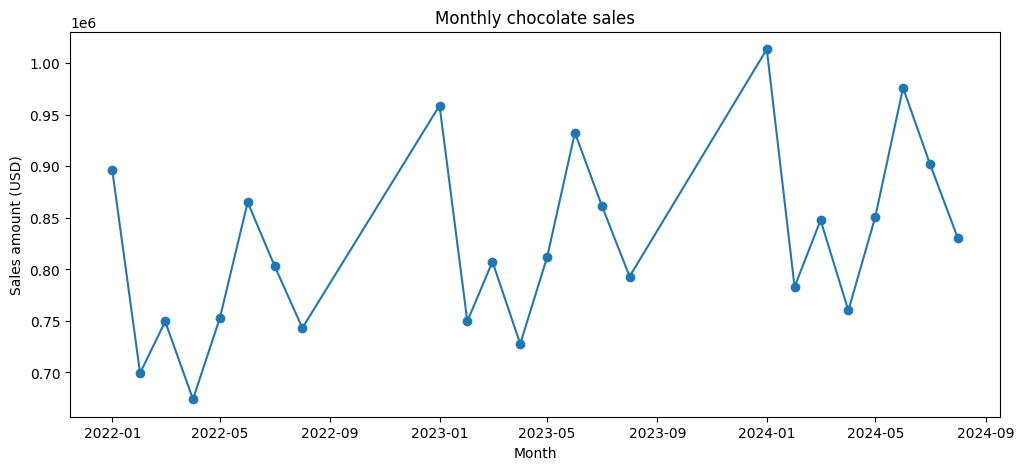

In [9]:
monthly_sales = sales.groupby(["Year", "Month"])["Amount"].sum().reset_index()
monthly_sales["YearMonth"] = pd.to_datetime(
    monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str)
)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales["YearMonth"], monthly_sales["Amount"], marker="o")
plt.title("Monthly chocolate sales")
plt.xlabel("Month")
plt.ylabel("Sales amount (USD)")
plt.show()


In [13]:
from scipy import stats
x = sales["Amount"].values
n = len(x)
mean = x.mean()
se = x.std(ddof=1) / np.sqrt(n)

alpha = 0.05
tcrit = stats.t.ppf(1 - alpha/2, df=n-1)

ci_sales = (mean - tcrit*se, mean + tcrit*se)
mean, ci_sales


(np.float64(6030.338775137113),
 (np.float64(5879.956331182495), np.float64(6180.721219091731)))